# Movimento de um projétil com resistência do ar e variação da densidade com a altitude

Gessé de Castro Adam e Clóvis Caetano

Última edição: 26 de junho de 2024

## Teoria

Para analisar o movimento de projéteis que atingem grandes altitudes, é necessário considerar que a densidade do ar não é constante. A densidade do ar depende da pressão e da temperatura. Um modelo simples fornece a seguinte variação da densidade $\rho$ com a altitude $y$:

$$
\rho(y) = \rho_0\left(1-{\frac {Ly}{T_{0}}}\right)^{\alpha},\tag{1}
$$

onde $\rho_0$ e $T_0$ são a densidade e temperatura do ar no nível do mar, respectivamente, $L$ é o gradiante térmico vertical e $\alpha$ é um parâmetro adimensional. A densidade $\rho_0$ pode ser calculada a partir da temperatura $T_0$ e da pressão $p_0$ ao nível do mar:

$$
\rho_0 = \frac{Mp_0}{RT_0}, 
$$

onde $M$ é a massa molar do ar e $R$ é constante universal dos gases. O gradiente térmico adiabático é dado por:

$$
L = \frac{\gamma - 1}{\gamma}\frac{Mg}{R},
$$ 

onde $\gamma$ é o  coeficiente de expansão adiabática. Finalmente, o parâmetro $\alpha$ pode ser determinado como:

$$
\alpha = \frac{Mg}{RL} - 1.
$$

A expressão (1) é válidade se $y < T_0/L$. Do contrário, consideramos $\rho = 0$.

As equações do movimento são as mesmas apresentadas no `notebook03`:

$$
\left\{
\begin{align*}
a_x&=-q(v_x^2+v_y^2)^{1/2}v_x\\
a_y&=-g-q(v_x^2+v_y^2)^{1/2}v_y,
\end{align*}
\right.
$$

com 

$$
q = {\displaystyle\frac{C\rho A}{2m}}.
$$

A diferença é que aqui consideramos que $\rho$, e portanto $q$, dependem da altitude.

Para simular o lançamento do projétil do Canhão de Paris, usaremos os seguintes dados:

| Quantidade |             Significado             |      Valor     |
|:----------:|:-----------------------------------:|:--------------:|
|     $m$    | Massa do projétil                   | 106 kg         |
|     $d$    | Diâmetro do projétil                | 210 mm         |
|     $C$    | Coeficiente de arrasto              | 0,2            |
|    $v_0$   | Velocidade inicial                  | 1640 m/s       |
|     $g$    | Aceleração da gravidade             | 9,81 m/s$^2$   |
|    $p_0$   | Pressão atmosférica ao nível do mar | 101325 Pa      |
|    $T_0$   | Temperatura do ar no nível do mar   | 288,15 K       |
|     $M$    | Massa molar do ar                   | 0,02896 kg/mol |
|     $R$    | Constante universal dos gases       | 8,31 J/mol K   |
|  $\gamma$  | Coeficiente de expansão adiabática  | 1,4            |

## Implementação

In [1]:
# Carregando bibliotecas que serão usadas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [10]:
# Parâmetros

m = 106
d = 210e-3
C = 0.2            
g = 9.81
p0 = 101325
T0 = 288.15
M = 0.02896
R = 8.31
gamma = 1.4

In [4]:
# Calculando algumas quantidades

A = np.pi*(d/2)**2           #Área de seção transversal do projétil
rho_0 = M*p0/(R*T0)          #Densidade do ar ao nível do mar
L = (gamma -1)/gamma * M*g/R #Gradiente térmico vertical
alpha = M*g/(R*L) - 1        #Expoente da expressão da densidade 

In [5]:
def rho(y):
    """
    Função que calcula a densidade do ar de acordo com a altitude.
    """
    if y < T0/L:
        return rho_0*(1 - L*y/T0)**alpha
    else:
        return 0 

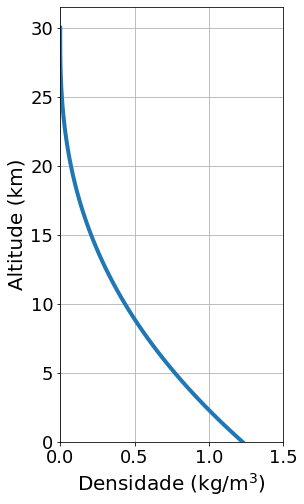

In [6]:
# Fazendo o gráfico da variação da densidade com a altitude

fig,ax = plt.subplots()
ax.figure.set_size_inches(4, 8)

altitude = []
densidade = []
for y in np.linspace(0, 3e4, 100):
    altitude.append(y) 
    densidade.append(rho(y))
ax.plot(densidade, altitude, lw=4)  
ax.set_xlabel('Densidade (kg/m$^3$)', size=20)
ax.set_ylabel('Altitude (km)', size=20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax.set_xlim(0,1.5)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=18)
plt.grid()
fig.savefig("densidade.png", dpi=300, facecolor='white', bbox_inches='tight')

In [7]:
def aceleracao0(x, y, vx, vy):
    """
    Calcula a aceleração do projétil sem resistência do ar
    """
    ax = 0
    ay = -g
    return ax, ay

def aceleracao1(x, y, vx, vy):
    """
    Calcula a aceleração do projétil com resistência do ar
    mas com densidade do ar constante
    """
    q = C*rho(0)*A/(2*m)
    v = np.sqrt(vx**2+vy**2)
    ax = -q*v*vx
    ay = -g-q*v*vy
    return ax, ay

def aceleracao2(x, y, vx, vy):
    """
    Calcula a aceleração do projétil com resistência do ar
    e densidade do ar variando com a altitude
    """
    q = C*rho(y)*A/(2*m)
    v = np.sqrt(vx**2+vy**2)
    ax = -q*v*vx
    ay = -g-q*v*vy
    return ax, ay

In [8]:
# Métodos numéricos

def euler(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Euler
    """
    ax, ay = aceleracao(x, y, vx, vy)
    vx_novo = vx + ax*dt 
    vy_novo = vy + ay*dt
    x_novo = x + vx*dt
    y_novo = y + vy*dt
    return x_novo, y_novo, vx_novo, vy_novo

def euler_cromer(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Euler-Cromer.
    """
    ax, ay = aceleracao(x, y, vx, vy)
    vx_novo = vx + ax*dt 
    vy_novo = vy + ay*dt
    x_novo = x + vx_novo*dt
    y_novo = y + vy_novo*dt
    return x_novo, y_novo, vx_novo, vy_novo

def heun(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Heun.
    """
    ax1, ay1 = aceleracao(x, y, vx, vy)
    vx1 = vx + ax1*dt
    vy1 = vy + ay1*dt
    x1 = x + vx*dt
    y1 = y + vy*dt
    ax2, ay2 = aceleracao(x1, y1, vx1, vy1)
    vx2 = vx + ax2*dt
    vy2 = vy + ay2*dt
    x2 = x + vx1*dt
    y2 = y + vy1*dt
    x_novo = (x1 + x2)/2
    y_novo = (y1 + y2)/2
    vx_novo = (vx1 + vx2)/2
    vy_novo = (vy1 + vy2)/2
    return x_novo, y_novo, vx_novo, vy_novo

def runge_kutta(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de 
    Runge-Kutta de 4ª ordem.
    """
    ax1, ay1 = aceleracao(x, y, vx, vy)  
    k1vx = ax1*dt
    k1vy = ay1*dt
    k1x = vx*dt
    k1y = vy*dt
    ax2, ay2 = aceleracao(x+k1x/2, y+k1y/2, vx+k1vx/2, vy+k1vy/2)  
    k2vx = ax2*dt
    k2vy = ay2*dt
    k2x = (vx+k1vx/2)*dt
    k2y = (vy+k1vy/2)*dt
    ax3, ay3 = aceleracao(x+k2x/2, y+k2y/2, vx+k2vx/2, vy+k2vy/2)  
    k3vx = ax3*dt
    k3vy = ay3*dt
    k3x = (vx+k2vx/2)*dt
    k3y = (vy+k2vy/2)*dt
    ax4, ay4 = aceleracao(x+k3x, y+k3y, vx+k3vx, vy+k3vy)  
    k4vx = ax4*dt
    k4vy = ay4*dt
    k4x = (vx+k3vx)*dt
    k4y = (vy+k3vy)*dt
    x_novo = x + 1/6*(k1x + 2*k2x + 2*k3x + k4x) 
    y_novo = y + 1/6*(k1y + 2*k2y + 2*k3y + k4y)
    vx_novo = vx + 1/6*(k1vx + 2*k2vx + 2*k3vx + k4vx)
    vy_novo = vy + 1/6*(k1vy + 2*k2vy + 2*k3vy + k4vy)
    return x_novo, y_novo, vx_novo, vy_novo

In [9]:
def trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min):
    """
    Função para calcular as coordenadas e as componentes da velocidade do projétil
    """
    # Usando as condições iniciais
    t = t0
    x = x0
    y = y0
    vx = vx0
    vy = vy0

    # Criando listas para armazenar os valores calculados
    t_salvo = np.array([t])
    x_salvo = np.array([x])
    y_salvo = np.array([y])
    vx_salvo = np.array([vx])
    vy_salvo = np.array([vy])

    # Atualizando os valores das variáveis
    while t < t_max:
        t = t + dt
        x, y, vx, vy = metodo(x, y, vx, vy)
        t_salvo = np.append(t_salvo, t)
        x_salvo = np.append(x_salvo, x)
        y_salvo = np.append(y_salvo, y)
        vx_salvo = np.append(vx_salvo, vx)
        vy_salvo = np.append(vy_salvo, vy)  
        if y < y_min:
            break
    
    return t_salvo, x_salvo, y_salvo, vx_salvo, vy_salvo

In [12]:
# Condições iniciais
t0 = 0
x0 = 0
y0 = 0
v0 = 1640
theta0 = 45
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)

# Condições de parada
t_max = 10*60
y_min = 0 

# Incremento no tempo
dt = 1

# Método numérico
metodo = heun

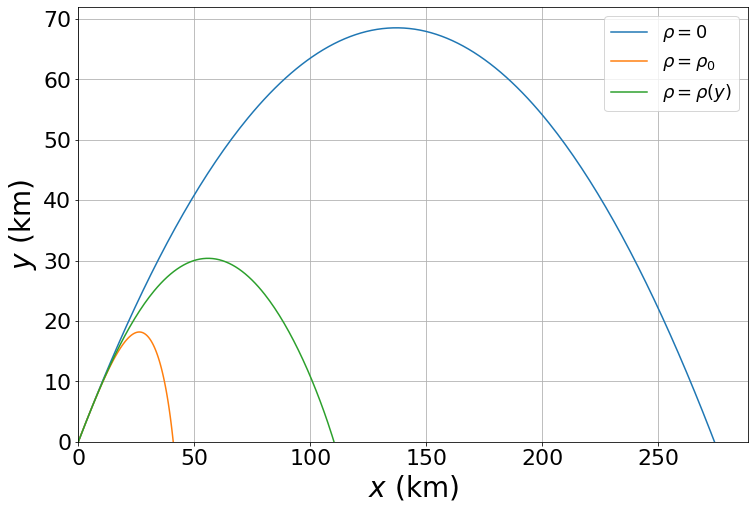

In [13]:
# Comparando as trajetórias do projétil sem resistência do ar, 
# com resistência quadrática e densidade do ar constante e com resistência
# quadrática e densidade variando com a altitude
fig,ax = plt.subplots()
ax.figure.set_size_inches(12, 8)

# Sem resistência do ar
aceleracao = aceleracao0
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\rho = 0$')

# Com resistência do ar mas com densidade do ar constante e igual ao valor ao 
# nível do mar
aceleracao = aceleracao1
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\rho = \rho_0$')

# Com resistência do ar e com densidade diminuindo com a altitude
aceleracao = aceleracao2
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\rho=\rho(y)$')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3)))
ax.set_xlabel('$x$ (km)', size=28)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax.set_ylabel('$y$ (km)', size=28)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=22)
ax.legend(fontsize=18, loc='upper right')
ax.grid()
fig.savefig("Resultado6.png", dpi=300, facecolor='white', bbox_inches='tight')

A seguir vamos variar o ângulo de lançamento para determinar o ângulo em que o alcance é máximo, isso considerando a densidade variando com a altitude.

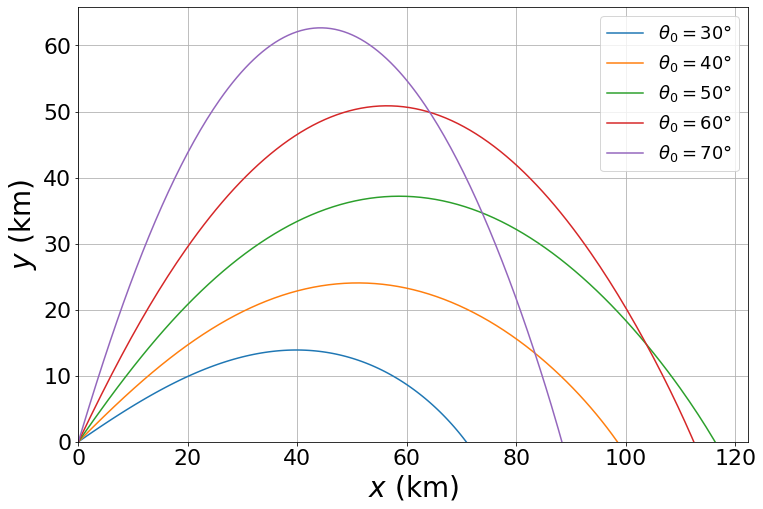

In [15]:
# Desenhando a trajetória para diferentes ângulos de lançamento
fig,ax = plt.subplots()
ax.figure.set_size_inches(12, 8)

aceleracao = aceleracao2

theta0 = 30
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\theta_0 = 30\degree$')

theta0 = 40
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\theta_0 = 40\degree$')

theta0 = 50
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\theta_0 = 50\degree$')

theta0 = 60
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\theta_0 = 60\degree$')

theta0 = 70
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, label=r'$\theta_0 = 70\degree$')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3)))
ax.set_xlabel('$x$ (km)', size=28)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax.set_ylabel('$y$ (km)', size=28)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=22)
ax.legend(fontsize=18, loc='upper right')
ax.grid()
fig.savefig("Resultado7.png", dpi=300, facecolor='white', bbox_inches='tight')

Pelo gráfico vemos que o ângulo em que o alcance é máximo está entre 40º e 60º. Vamos determinar o alcance variando o ângulo de lançamento a cada 1º.

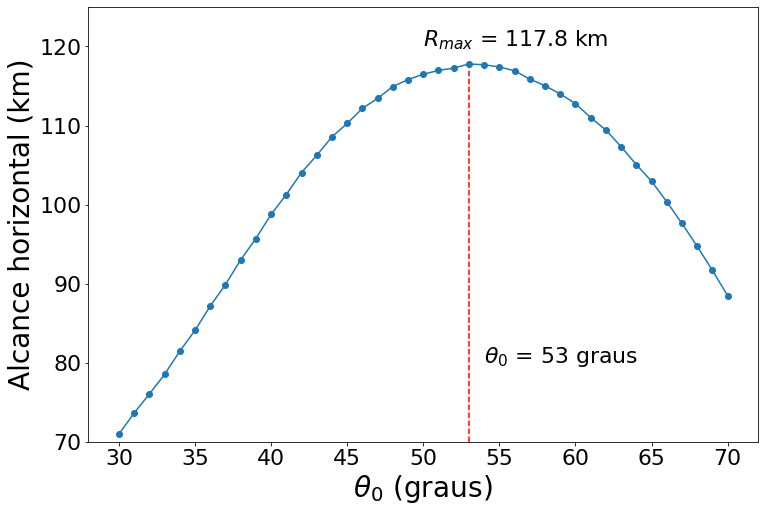

In [16]:
theta0 = np.arange(30, 71, 1)
alcance = []
for i in theta0:
    theta0_rad = np.deg2rad(i)
    vx0 = v0*np.cos(theta0_rad)
    vy0 = v0*np.sin(theta0_rad)
    t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
    alcance.append(x.max())

R_max = np.max(alcance)
theta0_max = theta0[np.argmax(alcance)]

fig,ax = plt.subplots()
ax.figure.set_size_inches(12, 8)
ax.plot(theta0, alcance, 'o-')
ax.set_xlabel(r'$\theta_0$ (graus)', size=28)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3)))
ax.set_ylabel('Alcance horizontal (km)', size=28)
ax.tick_params(labelsize=22)
ax.set_ylim(70e3, 125e3)
ax.vlines(theta0_max,ymin=70e3,ymax=R_max, color='red', linestyle='dashed')
plt.text(54, 80e3, r'$\theta_0$ = '+str(round(theta0_max,1))+' graus', fontsize=22)
plt.text(50, 120e3, r'$R_{max}$ = '+str(round(R_max/1e3,1))+' km', fontsize=22)
plt.show()
fig.savefig("Resultado8.png", dpi=300, facecolor='white', bbox_inches='tight')